# Get players data from stats nba using API

Better select year range same as in game history

Better use option "3" for Playoffs and Regulars 

In [3]:
import pandas as pd
import requests

pd.set_option('display.max_columns', None)  # remove max columns 

def fetch_data(season, season_type):
    season_type_url = season_type.replace(" ", "%20")
    url = f'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=20{season}&SeasonType={season_type_url}&StatCategory=PTS'
    print(f"Fetching {season_type.lower()} data for season 20{season}: {url}")
    
    # Make the API request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data['resultSet']['rowSet'], columns=data['resultSet']['headers'])
        df['Season_Type'] = "Regular" if season_type == "Regular Season" else "Playoffs"
        df['Year'] = season  
        return df
    else:
        print(f"Failed to fetch data for 20{season}, {season_type}. Status code: {response.status_code}")
        return pd.DataFrame()

print("Enter the season format (e.g., '19-23'): ")
inputSeason = input()

print("Choose the season type: \n1. Regular Season\n2. Playoffs\n3. Both")
season_type_choice = input("Enter your choice (1, 2, or 3): ")

start_year, end_year = inputSeason.split('-')
all_data = []

if len(start_year) != 2 or len(end_year) != 2 or int(start_year) >= int(end_year):
    print("Invalid input format. Please use 'yy-yy' format with a valid year range.")
elif season_type_choice not in ['1', '2', '3']:
    print("Invalid choice. Please enter 1 for Regular Season, 2 for Playoffs, or 3 for Both.")
else:
    season_types = {
        '1': ['Regular Season'],
        '2': ['Playoffs'],
        '3': ['Regular Season', 'Playoffs']
    }

    for year in range(int(start_year), int(end_year) + 1):
        season = f"{year}-{year+1}"  # Format the season
        for season_type in season_types[season_type_choice]:
            df = fetch_data(season, season_type)
            if not df.empty:
                all_data.append(df)

    if all_data:
        final_df = pd.concat(all_data, ignore_index=True)
        final_df.drop(columns=['RANK'], inplace=True)
        
        # Show the final table
        print("Final table:")
        print(final_df)
        
        # Save the data
        save_choice = input("Do you want to save the data to a CSV file? (yes/no): ").lower()
        if save_choice == 'yes':
            file_name = f"nba_stats_{inputSeason}_{season_type_choice}.csv"
            final_df.to_csv(file_name, index=False)
            print(f"Data saved to {file_name}")
        else:
            print("Data not saved.")
    else:
        print("No data fetched.")

Enter the season format (e.g., '19-23'): 


 16-24


Choose the season type: 
1. Regular Season
2. Playoffs
3. Both


Enter your choice (1, 2, or 3):  3


Fetching regular season data for season 2016-17: https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2016-17&SeasonType=Regular%20Season&StatCategory=PTS
Fetching playoffs data for season 2016-17: https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2016-17&SeasonType=Playoffs&StatCategory=PTS
Fetching regular season data for season 2017-18: https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2017-18&SeasonType=Regular%20Season&StatCategory=PTS
Fetching playoffs data for season 2017-18: https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2017-18&SeasonType=Playoffs&StatCategory=PTS
Fetching regular season data for season 2018-19: https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2018-19&SeasonType=Regular%20Season&StatCategory=PTS
Fetching playoffs data for season 2018-19: https://stats.nba.com/stats/leagueLeaders?LeagueID

Do you want to save the data to a CSV file? (yes/no):  yes


Data saved to nba_stats_16-24_3.csv


# Calculate additional features and adjust format for NBA player stats

In [4]:
import pandas as pd

# Load the CSV data into a DataFrame
df = pd.read_csv('nba_stats_16-24_3.csv')  # Replace with your actual file path if needed

# Calculate additional metrics
df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']))
df['FTr'] = df['FTA'] / df['FGA']
df['3PAr'] = df['FG3A'] / df['FGA']
df['PPG'] = df['PTS'] / df['GP']
df['APG'] = df['AST'] / df['GP']

# Rename 'Season_Type' to 'TYPE' and replace its values with integers
df.rename(columns={'Season_Type': 'TYPE'}, inplace=True)
df['TYPE'] = df['TYPE'].map({'Regular': 0, 'Playoff': 1})

# Convert 'Year' to 'SEASON' in '2019-2020' format
df['SEASON'] = df['Year'].apply(lambda x: '20' + x.split('-')[0] + '-20' + x.split('-')[1])
df.drop('Year', axis=1, inplace=True)  # Remove 'Year' column

# Ensure 'TYPE' column is of integer type if it exists
df['TYPE'] = df['TYPE'].astype(float)

# Replace empty rows (NaN values) with 1.0
df['TYPE'].fillna(1.0, inplace=True)

# Convert the 'TYPE' column to int
df['TYPE'] = df['TYPE'].astype(int)

# Show DataFrame
print(df)

# Save to CSV 
df.to_csv('enhanced_basketball_stats.csv', index=False)
print("Saved as enhanced_basketball_stats.csv")


      PLAYER_ID             PLAYER     TEAM_ID TEAM  GP   MIN   FGM   FGA  \
0        201566  Russell Westbrook  1610612760  OKC  81  34.6  10.2  24.0   
1        201935       James Harden  1610612745  HOU  81  36.4   8.3  18.9   
2        202738      Isaiah Thomas  1610612738  BOS  76  33.8   9.0  19.4   
3        203076      Anthony Davis  1610612740  NOP  75  36.1  10.3  20.3   
4        201942      DeMar DeRozan  1610612761  TOR  74  35.4   9.7  20.9   
...         ...                ...         ...  ...  ..   ...   ...   ...   
2900    1630231          KJ Martin  1610612755  PHI  42  11.5   1.5   2.8   
2901    1630192         Zeke Nnaji  1610612743  DEN  43   9.8   1.3   2.8   
2902     202397          Ish Smith  1610612766  CHA  43  17.2   1.5   3.7   
2903    1630550            JT Thor  1610612766  CHA  45  12.9   1.1   3.1   
2904    1641748  Andre Jackson Jr.  1610612749  MIL  46  10.8   1.0   1.9   

      FG_PCT  FG3M  FG3A  FG3_PCT  FTM   FTA  FT_PCT  OREB  DREB   REB   AS

# Adjust player stats data to team level

In [5]:
import pandas as pd

def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)

    # Calculations for additional player-level metrics
    df['Shooting_Efficiency'] = df['FGM'] / df['FGA']
    df['True_Shooting_Percentage'] = df['TS%']
    df['Assist_Turnover_Ratio'] = df['AST'] / df['TOV']
    df['Defensive_Rebounds_Percentage'] = df['DREB'] / (df['DREB'] + df['OREB'])
    df['Offensive_Rebounds_Percentage'] = df['OREB'] / (df['DREB'] + df['OREB'])
    df['Avg_Scoring'] = df['PTS'] / df['GP']
    df['Defensive_Score'] = df['STL'] + df['BLK']
    df['Total_Efficiency'] = df['EFF']  

    return df

def aggregate_team_level_stats(df):
    agg_funcs = {
        'MIN': 'sum',
        'FGM': 'sum',
        'FGA': 'sum',
        'FG3M': 'sum',
        'FG3A': 'sum',
        'FTM': 'sum',
        'FTA': 'sum',
        'OREB': 'sum',
        'DREB': 'sum',
        'REB': 'sum',
        'AST': 'sum',
        'STL': 'sum',
        'BLK': 'sum',
        'TOV': 'sum',
        'PTS': 'sum',
        # Aggregate for efficiency and percentages
        'Shooting_Efficiency': 'mean',
        'True_Shooting_Percentage': 'mean',
        'Assist_Turnover_Ratio': 'mean',
        'Defensive_Rebounds_Percentage': 'mean',
        'Offensive_Rebounds_Percentage': 'mean',
        'Avg_Scoring': 'mean',
        'Defensive_Score': 'sum',
        'Total_Efficiency': 'sum'
    }
    team_stats = df.groupby(['TEAM_ID', 'SEASON', 'TYPE']).agg(agg_funcs).reset_index()
    
    return team_stats

def main():
    file_path = 'enhanced_basketball_stats.csv'  # Update with the actual path if needed
    data = load_and_prepare_data(file_path)
    team_level_stats = aggregate_team_level_stats(data)
    
    print(team_level_stats)
    team_level_stats.to_csv('team_level_aggregated_stats.csv', index=False)
    print("Team-level aggregated stats saved successfully.")

if __name__ == "__main__":
    main()


        TEAM_ID     SEASON  TYPE    MIN   FGM   FGA  FG3M  FG3A   FTM   FTA  \
0    1610612737  2016-2017     0  252.6  41.4  91.4   9.7  27.7  20.0  27.3   
1    1610612737  2016-2017     1  237.2  36.8  83.8   8.2  27.1  22.0  28.0   
2    1610612737  2017-2018     0  154.9  27.6  60.3   6.2  17.8  12.2  15.3   
3    1610612737  2018-2019     0  198.9  36.1  78.5  10.5  30.1  14.8  20.0   
4    1610612737  2019-2020     0  210.5  32.7  76.7  11.2  33.1  17.9  22.1   
..          ...        ...   ...    ...   ...   ...   ...   ...   ...   ...   
331  1610612766  2019-2020     0  213.1  34.5  78.7  11.0  31.2  14.9  20.1   
332  1610612766  2020-2021     0  222.7  34.6  78.9  13.1  35.9  14.0  18.3   
333  1610612766  2021-2022     0  229.0  41.7  86.6  13.0  35.7  15.8  21.5   
334  1610612766  2022-2023     0  100.6  18.1  40.5   5.2  15.7   7.1   9.4   
335  1610612766  2023-2024     0  181.6  27.6  60.0   8.6  23.1   9.5  12.0   

     OREB  DREB   REB   AST  STL  BLK   TOV    PTS 

# Get matchups using NBA API

**Select year range same as in player stats**

<b>It may take some time to complete<b> <br>

Credits to the NBA API <br> https://pypi.org/project/nba_api/

In [7]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd
import time

def get_games_for_team(team_abbr, start_year, end_year):
    nba_teams = teams.get_teams()
    team = [team for team in nba_teams if team['abbreviation'] == team_abbr][0]
    team_id = team['id']
    
    all_games = pd.DataFrame()
    for year in range(start_year, end_year):
        season = f"{year}-{str(year+1)[2:]}"
        gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=team_id, season_nullable=season)
        print(f"Getting season {season}")
        games = gamefinder.get_data_frames()[0]
        games = games.dropna(axis=1, how='all')
        all_games = pd.concat([all_games, games], ignore_index=True)
        time.sleep(3)  # Delay 
    
    return all_games

def get_games_for_all_teams(start_year, end_year):
    nba_teams = teams.get_teams()
    all_games = pd.DataFrame()
    
    for team in nba_teams:
        team_abbr = team['abbreviation']
        print(f"Fetching games for {team_abbr}...")
        team_games = get_games_for_team(team_abbr, start_year, end_year)
        all_games = pd.concat([all_games, team_games], ignore_index=True)
        time.sleep(8)  
    
    return all_games

# User promt
start_year = int(input("Enter start year (e.g., 2019 for the 2019-2020 season): "))
end_year = int(input("Enter end year (e.g., 2020 for the 2019-2020 season): ")) + 1  # Adjust for range if needed
team_or_all = input("Enter the team's abbreviation (e.g., 'BOS') or 'all' to scrape data for each year and team: ").upper()

if team_or_all == 'ALL':
    games_data = get_games_for_all_teams(start_year, end_year)
else:
    games_data = get_games_for_team(team_or_all, start_year, end_year)

print(games_data.head())

# save the data to a CSV file
save_option = input("Do you want to save the data to a CSV file? (yes/no): ").lower()
if save_option == 'yes':
    filename = input("Enter the filename (e.g., 'games_data.csv'): ")
    games_data.to_csv(filename, index=False)
    print(f"Data saved to {filename}.")
else:
    print("Data not saved.")

Enter start year (e.g., 2019 for the 2019-2020 season):  2016
Enter end year (e.g., 2020 for the 2019-2020 season):  2024
Enter the team's abbreviation (e.g., 'BOS') or 'all' to scrape data for each year and team:  all


Fetching games for ATL...
Getting season 2016-17
Getting season 2017-18
Getting season 2018-19
Getting season 2019-20
Getting season 2020-21
Getting season 2021-22
Getting season 2022-23
Getting season 2023-24
Getting season 2024-25
Fetching games for BOS...
Getting season 2016-17
Getting season 2017-18
Getting season 2018-19
Getting season 2019-20
Getting season 2020-21
Getting season 2021-22
Getting season 2022-23
Getting season 2023-24
Getting season 2024-25
Fetching games for CLE...
Getting season 2016-17
Getting season 2017-18
Getting season 2018-19
Getting season 2019-20
Getting season 2020-21
Getting season 2021-22
Getting season 2022-23
Getting season 2023-24
Getting season 2024-25
Fetching games for NOP...
Getting season 2016-17
Getting season 2017-18
Getting season 2018-19
Getting season 2019-20
Getting season 2020-21
Getting season 2021-22
Getting season 2022-23
Getting season 2023-24
Getting season 2024-25
Fetching games for CHI...
Getting season 2016-17
Getting season 2017

Do you want to save the data to a CSV file? (yes/no):  yes
Enter the filename (e.g., 'games_data.csv'):  games_data.csv


Data saved to games_data.csv.


# Merge matchup games and team level stats files

In [9]:
import pandas as pd

# Load the datasets
matchup_df = pd.read_csv('games_data.csv')
team_stats_df = pd.read_csv('team_level_aggregated_stats.csv')

# Convert 'GAME_DATE' in matchup_df to datetime
matchup_df['GAME_DATE'] = pd.to_datetime(matchup_df['GAME_DATE'])

# Extract year from 'GAME_DATE' and create a new column 'YEAR'
matchup_df['YEAR'] = matchup_df['GAME_DATE'].dt.year.astype(str)

# Ensure the 'SEASON' in team_stats_df is in the correct format, e.g., '2023-2024' from '20192020'
team_stats_df['SEASON'] = team_stats_df['SEASON'].astype(str).apply(lambda x: x[:4] + '-' + x[4:])

# Extract the start year from 'SEASON' to match with 'YEAR' in matchup_df
team_stats_df['YEAR'] = team_stats_df['SEASON'].apply(lambda x: x.split('-')[0])

# Merge the DataFrames on 'TEAM_ID' and 'YEAR'
merged_df = pd.merge(matchup_df, team_stats_df, left_on=['TEAM_ID', 'YEAR'], right_on=['TEAM_ID', 'YEAR'], how='inner')

# Differential Stats
merged_df['Point_Diff'] = merged_df['PTS_x'] - merged_df['PTS_y']
merged_df['Rebound_Diff'] = merged_df['REB_x'] - merged_df['REB_y']
merged_df['Assist_Diff'] = merged_df['AST_x'] - merged_df['AST_y']

# Seasonal Performance Metrics
seasonal_perf_metrics = merged_df.groupby(['YEAR', 'TEAM_ID']).agg({
    'PTS_x': 'mean',
    'REB_x': 'mean',
    'AST_x': 'mean',
}).reset_index().rename(columns={'PTS_x': 'Avg_Points', 'REB_x': 'Avg_Rebounds', 'AST_x': 'Avg_Assists'})

# Differential Stats
merged_df['Point_Diff'] = merged_df['PTS_x'] - merged_df['PTS_y']
merged_df['Rebound_Diff'] = merged_df['REB_x'] - merged_df['REB_y']
merged_df['Assist_Diff'] = merged_df['AST_x'] - merged_df['AST_y']

# Opponent Stats
opponent_stats = merged_df.groupby(['YEAR', 'TEAM_ID']).agg({
    'PTS_y': 'mean',
    'REB_y': 'mean',
    'AST_y': 'mean',
}).reset_index().rename(columns={'PTS_y': 'Opp_Avg_Points', 'REB_y': 'Opp_Avg_Rebounds', 'AST_y': 'Opp_Avg_Assists'})

# Late-Season Performance - Assuming late season is post All-Star break (Feb 15)
merged_df['Late_Season_Flag'] = merged_df['GAME_DATE'].apply(lambda x: 1 if x > pd.Timestamp(year=x.year, month=2, day=15) else 0)
late_season_perf = merged_df[merged_df['Late_Season_Flag'] == 1].groupby(['YEAR', 'TEAM_ID']).agg({
    'PTS_x': 'mean',
    'REB_x': 'mean',
    'AST_x': 'mean',
}).reset_index().rename(columns={'PTS_x': 'Late_Avg_Points', 'REB_x': 'Late_Avg_Rebounds', 'AST_x': 'Late_Avg_Assists'})

# Merging the calculated features back to the main dataframe
features_to_merge = [seasonal_perf_metrics, opponent_stats, late_season_perf]
for feature_df in features_to_merge:
    merged_df = pd.merge(merged_df, feature_df, on=['YEAR', 'TEAM_ID'], how='left')

# Save the enriched dataset with new features
merged_df.to_csv('enriched_team_stats_matchup.csv', index=False)

print(merged_df)

print("Features added and saved successfully file name enriched_team_stats_matchup.csv")


       SEASON_ID     TEAM_ID TEAM_ABBREVIATION          TEAM_NAME   GAME_ID  \
0          42016  1610612737               ATL      Atlanta Hawks  41600136   
1          42016  1610612737               ATL      Atlanta Hawks  41600135   
2          42016  1610612737               ATL      Atlanta Hawks  41600134   
3          42016  1610612737               ATL      Atlanta Hawks  41600133   
4          42016  1610612737               ATL      Atlanta Hawks  41600132   
...          ...         ...               ...                ...       ...   
27859      22023  1610612766               CHA  Charlotte Hornets  22300063   
27860      12023  1610612766               CHA  Charlotte Hornets  12300060   
27861      12023  1610612766               CHA  Charlotte Hornets  12300038   
27862      12023  1610612766               CHA  Charlotte Hornets  12300025   
27863      12023  1610612766               CHA  Charlotte Hornets  12300016   

       GAME_DATE      MATCHUP WL  MIN_x  PTS_x  FGM

# Adjust format of team stats matchup file

In [10]:
import pandas as pd

# Load the data
data = pd.read_csv('enriched_team_stats_matchup.csv')

# Remove non numeric
data.drop(columns='TEAM_NAME', inplace=True)

data['WL'] = data['WL'].replace({'L': '0', 'W': '1'})

# Function to clean the 'MATCHUP' column
def clean_matchup(matchup):
    # Split the matchup string into two teams
    teams = matchup.split()
    
    # If the matchup contains 'vs.', return only the first and last team names
    if 'vs.' in teams:
        return teams[0] + ' ' + teams[-1]
    
    # If the matchup contains '@', return only the first and last team names
    elif '@' in teams:
        return teams[0] + ' ' + teams[-1]
    
    # Return the original matchup if neither '@' nor 'vs.' is found
    else:
        return matchup

# Apply the clean_matchup function to the 'MATCHUP' column
data['MATCHUP'] = data['MATCHUP'].apply(clean_matchup)

data['MATCHUP'] = data['MATCHUP'].str.replace(' ', '')

team_ids_stats = {
    'PHI': 1610612755, 'DAL': 1610612742, 'OKC': 1610612760, 'MIL': 1610612749,
    'PHX': 1610612756, 'CLE': 1610612739, 'GSW': 1610612744, 'SAC': 1610612758,
    'ATL': 1610612737, 'BOS': 1610612738, 'NYK': 1610612752, 'DEN': 1610612743,
    'MIN': 1610612750, 'LAL': 1610612747, 'MEM': 1610612763, 'LAC': 1610612746,
    'UTA': 1610612762, 'IND': 1610612754, 'ORL': 1610612753, 'DET': 1610612765,
    'CHI': 1610612741, 'WAS': 1610612764, 'NOP': 1610612740, 'BKN': 1610612751,
    'HOU': 1610612745, 'POR': 1610612757, 'MIA': 1610612748, 'CHA': 1610612766,
    'SAS': 1610612759, 'TOR': 1610612761
}

data['TEAM2'] = data['MATCHUP'].apply(lambda x: x[3:]).map(team_ids_stats)

# Drop the rest of non numerics
data.drop(columns='TEAM_ABBREVIATION', inplace=True)
data.drop(columns='MATCHUP', inplace=True)
data.drop(columns='SEASON', inplace=True)

# Show
print(data)

# Save
updated_csv_path = 'TEAMS_AND_GAMES_STAST.csv'  # Adjust with desired output file path
data.to_csv(updated_csv_path, index=False)

       SEASON_ID     TEAM_ID   GAME_ID   GAME_DATE WL  MIN_x  PTS_x  FGM_x  \
0          42016  1610612737  41600136  2017-04-28  0    240     99     37   
1          42016  1610612737  41600135  2017-04-26  0    241     99     38   
2          42016  1610612737  41600134  2017-04-24  1    239    111     40   
3          42016  1610612737  41600133  2017-04-22  1    240    116     44   
4          42016  1610612737  41600132  2017-04-19  0    240    101     32   
...          ...         ...       ...         ... ..    ...    ...    ...   
27859      22023  1610612766  22300063  2023-10-25  1    240    116     43   
27860      12023  1610612766  12300060  2023-10-19  0    241     99     37   
27861      12023  1610612766  12300038  2023-10-15  1    241    117     46   
27862      12023  1610612766  12300025  2023-10-12  0    241     92     35   
27863      12023  1610612766  12300016  2023-10-10  0    239    109     36   

       FGA_x  FG_PCT  FG3M_x  FG3A_x  FG3_PCT  FTM_x  FTA_x  FT

# Again adjust the file to desire format

In [11]:
import pandas as pd

# Load the data
data = pd.read_csv('TEAMS_AND_GAMES_STAST.csv')
df = pd.DataFrame(data)
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Convert 'GAME_DATE' to Unix timestamp (number of seconds since 1970-01-01)
# First convert to 'int64' to ensure compatibility
data['GAME_DATE_TIMESTAMP'] = data['GAME_DATE'].view('int64') // 10**9
# List to store columns that cannot be converted to integer
non_convertible_columns = []
data.drop(columns='GAME_DATE', inplace=True)
# Function to attempt conversion and catch exceptions
def attempt_convert(df_column):
    try:
        # Try converting to float and rounding
        return df_column.astype(float).round(8)
    except ValueError:
        # Return None if conversion fails
        return None

# Iterate over columns and attempt conversion
unconvertible_columns = []
for column in df.columns:
    result = attempt_convert(df[column])
    if result is None:
        unconvertible_columns.append(column)
print(data)

csv_file_path = 'updated_team_stats_matchup.csv' 
data.to_csv(csv_file_path, index=False)
print(f"DataFrame saved to '{csv_file_path}' successfully.")

       SEASON_ID     TEAM_ID   GAME_ID   WL  MIN_x  PTS_x  FGM_x  FGA_x  \
0          42016  1610612737  41600136  0.0    240     99     37     78   
1          42016  1610612737  41600135  0.0    241     99     38     93   
2          42016  1610612737  41600134  1.0    239    111     40     90   
3          42016  1610612737  41600133  1.0    240    116     44     89   
4          42016  1610612737  41600132  0.0    240    101     32     79   
...          ...         ...       ...  ...    ...    ...    ...    ...   
27859      22023  1610612766  22300063  1.0    240    116     43     86   
27860      12023  1610612766  12300060  0.0    241     99     37     88   
27861      12023  1610612766  12300038  1.0    241    117     46     88   
27862      12023  1610612766  12300025  0.0    241     92     35     94   
27863      12023  1610612766  12300016  0.0    239    109     36     93   

       FG_PCT  FG3M_x  FG3A_x  FG3_PCT  FTM_x  FTA_x  FT_PCT  OREB_x  DREB_x  \
0       0.474      

# Final CSV file preparation before XGBoost

**Save the file for future games prediction**

In [12]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('updated_team_stats_matchup.csv')

# Rename "TEAM2" column to "TEAM2_ID"
data.rename(columns={'TEAM2': 'TEAM2_ID'}, inplace=True)

# Convert "TEAM2_ID" column to integer and handle missing values
data['TEAM2_ID'] = data['TEAM2_ID'].fillna(0).astype(int)

# Convert "WL" column to integer and handle missing values
data['WL'] = data['WL'].fillna(0).astype(int)

# Compute the Assist_Turnover_Ratio with a very small number added to the denominator to prevent division by zero
data['Assist_Turnover_Ratio'] = data.apply(lambda x: x['AST_x'] / (x['TOV_x'] + 1e-8), axis=1)

# Round the Assist_Turnover_Ratio to 8 decimal places
data['Assist_Turnover_Ratio'] = data['Assist_Turnover_Ratio'].round(8)

# Fill NaN values with the mean for numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data.mean())

# Drop columns
columns_to_drop = ['GAME_ID', 'PLUS_MINUS', 'PTS_x', 'PTS_y', 'YEAR']
data.drop(columns=columns_to_drop, inplace=True)

# Round all numeric columns to 8 decimal places, including handling of infinities by replacing them with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.round(8)

# Replace any NaN values that might have been introduced by rounding infinities
data.fillna(0, inplace=True)

print(data)

# Save the processed data to a new CSV file
csv_file_path = 'ready_team_stats_matchup.csv' # Save the file for future use
data.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to '{csv_file_path}' successfully.")

       SEASON_ID     TEAM_ID  WL  MIN_x  FGM_x  FGA_x  FG_PCT  FG3M_x  FG3A_x  \
0          42016  1610612737   0    240     37     78   0.474       9      32   
1          42016  1610612737   0    241     38     93   0.409       9      31   
2          42016  1610612737   1    239     40     90   0.444      12      31   
3          42016  1610612737   1    240     44     89   0.494       9      25   
4          42016  1610612737   0    240     32     79   0.405       4      20   
...          ...         ...  ..    ...    ...    ...     ...     ...     ...   
27859      22023  1610612766   1    240     43     86   0.500      11      37   
27860      12023  1610612766   0    241     37     88   0.420       4      28   
27861      12023  1610612766   1    241     46     88   0.523      12      38   
27862      12023  1610612766   0    241     35     94   0.372       6      30   
27863      12023  1610612766   0    239     36     93   0.387      10      38   

       FG3_PCT  FTM_x  FTA_

# XGBoost model

Accuracy: 0.8694
Precision: 0.8691
Recall: 0.8687
F1 Score: 0.8689
ROC AUC Score: 0.9440

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      2628
           1       0.87      0.88      0.88      2945

    accuracy                           0.87      5573
   macro avg       0.87      0.87      0.87      5573
weighted avg       0.87      0.87      0.87      5573



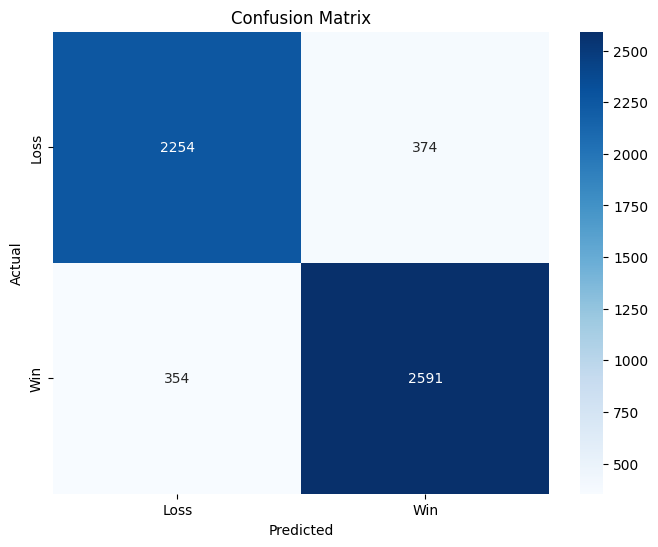

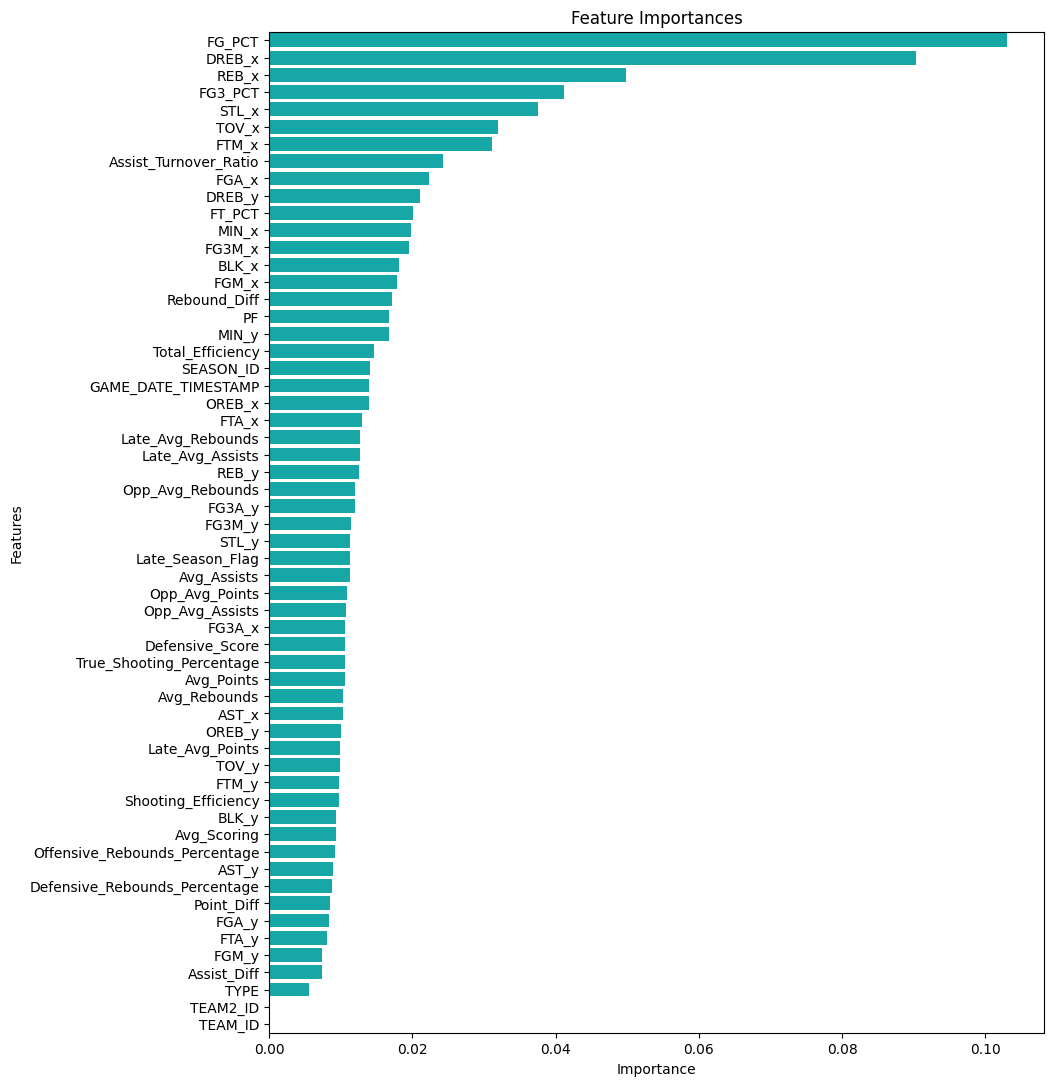

Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Cross-validation Score: 0.8648775057486033
Model saved to Team_lvl_matchup_xgboost_model.pkl


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('ready_team_stats_matchup.csv')

# Splitting features and target
features = [col for col in data.columns if col not in ('WL')]
target = 'WL'

X = data[features]
y = data[target].astype(int)  # Ensure target is integer type

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model definition
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameters space for RandomizedSearchCV
param_dist = {
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Hyperparameter tuning
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=13, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Training the model with the best parameters
final_model = xgb.XGBClassifier(**random_search.best_params_, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train, y_train)

# Model evaluation
y_val_pred = final_model.predict(X_val)
positive_probabilities = final_model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class

# Merics
metrics = {
    'Accuracy': accuracy_score(y_val, y_val_pred),
    'Precision': precision_score(y_val, y_val_pred, average='macro'),
    'Recall': recall_score(y_val, y_val_pred, average='macro'),
    'F1 Score': f1_score(y_val, y_val_pred, average='macro'),
    'ROC AUC Score': roc_auc_score(y_val, positive_probabilities)  
}

# Display performance metrics
for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

# Additional evaluations such as confusion matrix and classification report
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importances and sorting them in descending order
feature_importances = final_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# Sorting feature names based on sorted indexes of importances
sorted_feature_names = [features[index] for index in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Creating a bar plot
plt.figure(figsize=(10, 13))
sns.barplot(x=sorted_importances, y=sorted_feature_names, color="c")

# Adding chart labels and title for clarity
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Displaying best hyperparameters and CV score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-validation Score:", random_search.best_score_)

# Save the model to a file
model_filename = 'Team_lvl_matchup_xgboost_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(final_model, file)

print(f"Model saved to {model_filename}")

# XGBoost prediction test

Select and test 50 random games year range 2023-2024

In [9]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data_path = 'ready_team_stats_matchup.csv'  # Update with your actual file path if needed
data = pd.read_csv(data_path)

# Convert 'GAME_DATE_TIMESTAMP' to datetime
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE_TIMESTAMP'], unit='s')

# Filter for the years 2023-2024
data_filtered = data[(data['GAME_DATE'].dt.year == 2023) | (data['GAME_DATE'].dt.year == 2024)]

# Randomly select 50 games in data_filtered range 
data_sampled = data_filtered.sample(n=50)

# Convert GAME_DATE to a more readable format (year-month-day)
data_sampled['Readable_GAME_DATE'] = data_sampled['GAME_DATE'].dt.strftime('%Y-%m-%d')

# Now, proceed with the rest of prediction code using data_sampled instead of data_sorted

# Load the model
model_path = 'Team_lvl_matchup_xgboost_model.pkl'  
with open(model_path, 'rb') as file:
    final_model = pickle.load(file)

# Prepare the features for prediction by dropping target and non-feature columns
features_to_predict = data_sampled.drop(['WL', 'GAME_DATE', 'Readable_GAME_DATE'], axis=1, errors='ignore')

# Now, proceed with making predictions
predicted_outcomes = final_model.predict(features_to_predict)
predicted_probabilities = final_model.predict_proba(features_to_predict)

# Calculate the certainty percentage for the predicted class
certainty_percentage = np.max(predicted_probabilities, axis=1) * 100

# Attach the real outcomes, predictions, and their certainty to the dataframe
data_sampled['Real_WL'] = data_sampled['WL']  # Real outcomes
data_sampled['Predicted_WL'] = predicted_outcomes
data_sampled['Certainty_Percentage'] = certainty_percentage

# Initialize counters
total_matches = 0
total_wins = 0

# Iterate through each row
for index, row in data_sampled.iterrows():
    real_wl = row['WL']  # Extract Real_WL value
    predicted_wl = row['Predicted_WL']  # Extract Predicted_WL value
    
    # Check if the prediction was correct (i.e., WL matches Predicted_WL)
    if real_wl == predicted_wl:
        total_wins += 1
    total_matches += 1

# Calculate win rate percentage
win_rate_percentage = (total_wins / total_matches) * 100

# Show win rate related 
print("Win rate percentage: {:.2f}%".format(win_rate_percentage))
print(f"Total games: {total_matches} | Wins: {total_wins}")

# List of columns to display
output_columns = ['Readable_GAME_DATE', 'TEAM_ID', 'TEAM2_ID', 'Real_WL', 'Predicted_WL', 'Certainty_Percentage']

# Display the output with enhanced styling
styled_output = data_sampled[output_columns].style\
    .background_gradient(cmap='viridis', subset=['Certainty_Percentage'])\
    .format({'Certainty_Percentage': "{:.2f}%"})\
    .set_caption("Predicted Outcomes with Certainty")\
    .set_properties(padding="10px", border="2px solid black", align="left")

styled_output


Win rate percentage: 94.00%
Total games: 50 | Wins: 47


,Readable_GAME_DATE,TEAM_ID,TEAM2_ID,Real_WL,Predicted_WL,Certainty_Percentage
2717,2023-04-07,1610612741,1610612742,1,1,98.21%
14658,2023-01-07,1610612762,1610612741,0,0,82.08%
11157,2023-11-22,1610612755,1610612750,0,0,90.16%
11803,2023-03-05,1610612756,1610612742,1,1,91.72%
16478,2023-11-12,1610612766,1610612752,0,0,99.21%
7101,2023-01-16,1610612748,1610612737,0,0,61.64%
13094,2023-03-14,1610612759,1610612753,1,1,99.73%
9073,2023-03-25,1610612751,1610612748,1,1,97.98%
11820,2023-01-22,1610612756,1610612763,1,0,62.80%
588,2023-02-24,1610612737,1610612739,1,1,99.29%
